<div style="background-color: #FFFACD; padding: 10px;">

# Machine Learning MRes Glossary

#### *This glossary follows the order of the course's jupyter notebooks, you may choose to have a quick scan of the content before starting lectures*

<div style="background-color: #FFFACD; padding: 10px;">

## Index: <a id='index'></a>

</div>

*Optional knowledge to the course are labeled with a star*

- [Types of Machine Learning](#types-of-machine-learning)
- [Hyperparameters](#hyperparameters)
- [Overfitting & Underfitting ](U&O)
- [Bias vs. Variance](#B&V)
- [Bias and Error](#B&E)
- [Regression](#regression)
    - [Linear Regression](#linear-regression)
    - [Logistic Regression](#LR)
- [Cost Function](#cost-function)
- [Loss Function](#loss-function)
- [Least Squares](#least-squares)
- [Classification](#classification)
    - [Binary Classification](#BC)
    - [Multiclass Classification](#MC)
    - [Confusion Matrix](#condusionmatrix)
- [Support Vector Machine (SVM)](#SVM)
    - [Hard Margin SVM](#Hard)
    - [Soft Margin SVM](#Hard)
    - [Nonlinear SVM](#nonlinear)
- [Gradient-Based Optimisation](#gradient-based-optimisation)
    - [Newton Method](#newton-method)
    - [Gradient Descent](#gradient-descent)
- [Dimensionality Reduction](#dimensionality-reduction)
    - [PCA](#PCA)
- [Clustering](#clustering)
    - [K-Means](#K)
- [Singular Value Decomposition (SVD) (Visualisation)](#SVD)
- [KNN](#KNN)
- [Support Vector Machines](#SVM)
- [Instance-Based Learning](#Instance-Based-Learning)
- [Model-Based Learning](#Model-Based-Learning)
- [Decision Tree](#DT)
    - [Boosting](#BT)
- [Gradient Flow](#gradient-flow)
- [Activation Function](#Activation-Function)
    - [Activation Function Overview](#Activation-Function-Overview)
- [Neural Network](#Neural-Network)
    - [Layers](#Layers)
    - [Forward and Backward Propagation](#FBP)
    - [Weight](#Weight)
    - [Learning rate](#Learning-rate)
- [Types of Neural Networks](#TNN)
    - [ANN](#ANN)
    - [CNN](#CNN)
    - [GNN*](#GNN)
    - [RNN*](#RNN)


*Refer to HOML for additional information*

This is a notebook that groups important concepts included within the ML course. Keywords are included within the index list (open the sections for interactive code).

Run the cells below:

<div style="background-color: #FFFACD; padding: 10px;"> 

# Types of Machine Learning Systems [^](#index)
<a id='types-of-machine-learning'></a>

There are so many different types of Machine Learning systems that it is useful to classify them in broad categories based on:
- Whether or not they are trained with human supervision (supervised, unsupervised, semi-supervised, and Reinforcement Learning, the notebooks in this course covers all the learning types apart from semi-supervised)
- Whether or not they can learn incrementally on the fly (online versus batch learning)
- Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do (instance-based versus model-based learning)
These criteria are not exclusive; you can combine them in any way you like. For example, a state-of-the-art spam filter may learn on the fly using a deep neural network model trained using examples of spam and ham; this makes it an online, model- based, supervised learning system.

Refer to pg 36 onwards in HOML

<div style="background-color: #FFFACD; padding: 10px;">

# Hyperparameters [^](#index)<a id='hyperparameters'></a>


</div>

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix **‘hyper_’** suggests that they are **‘top-level’** parameters that control the learning process and the model parameters that result from it.

In this example:
```python 
# Creating a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, max_depth=10)

# n_estimators and max_depth are hyperparameters

# Training the model on the training data
rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf.predict(X_test)
```
In this example, `n_estimators` and `max_depth` are hyperparameters of the Random Forest Classifier. They are set before training the model and determine the number of decision trees to be used (n_estimators) and the maximum depth of each tree (max_depth).

<div style="background-color: #FFFACD; padding: 10px;">

# Overfitting and Underfitting (homl) [^](#index)<a id='U&O'></a>


</div>

**Overfitting** happens when the model is too complex relative to the amount and noisiness of the training data. The possible solutions are:
- To simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data or by constraining the model
- To gather more training data
- To reduce the noise in the training data (e.g., fix data errors and remove outliers)


As you might guess, **underfitting** is the opposite of **overfitting**: it occurs when your model is too simple to learn the underlying structure of the data. For example, a lin‐ ear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.
The main options to fix this problem are:
• Selecting a more powerful model, with more parameters
• Feeding better features to the learning algorithm (feature engineering)
• Reducing the constraints on the model (e.g., reducing the regularisation hyper‐ parameter)

In this code, 30 samples were generated from a sine function with some added noise. Then a polynomial features and a linear regression model are created for three different degrees: 1 (underfitting), 4 (good fit), and 15 (overfitting). The graph will show the samples, the true function, and the predicted function for each model. It will also display the mean squared error (MSE) for each model as the title, which indicates how well the model fits the data.

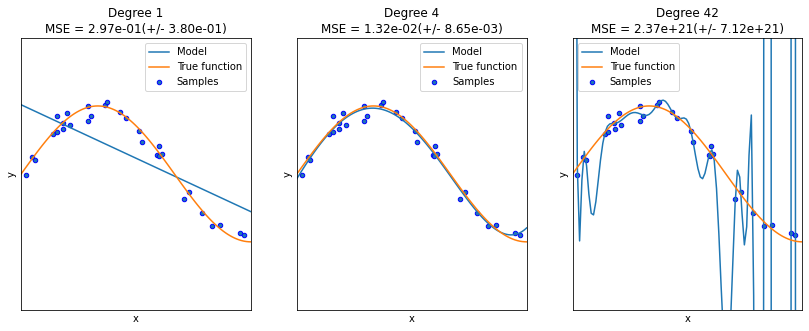

In [2]:
# visual repersentation of over and underfitting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(42)

n_samples = 30
degrees = [1, 4, 42]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


<div style="background-color: #FFFACD; padding: 10px;">

# Bias vs. Variance [^](#index)<a id='B&V'></a>


</div>

Here, we will describe what is sometimes known in Machine Learning as the *no-free-lunch theorem*. It describes the fact that an unbiased model will generally have high variance and, conversely, reducing the variance will increase the bias. Therefore, both aspects need to be balanced to achieve models whose predictions are as close as possible to the true value (‘accurate’) with as reduced variability as possible.

Here, we mention a few aspects related to this issue. In statistics, one calls an ‘estimator’ a rule to estimate a given quantity based on observed data. Let $\beta$ be the true parameters of the problem to be estimated and $\beta^*$ the least-squares estimate, and $\mathbb{E}$ is the expected value. First, we define two measures: 

$$Bias: ||\mathbb{E}[\beta^*] − \beta||$$
$$Variance: \mathbb{E}[(\beta−\beta^*)(\beta−\beta^*)^T]$$

The model formulation for the linear regression, ε is the residual term:

$$y=X\beta+ε$$ 
$$ε∼\mathcal{N}(0,σ^2)$$


Note that $σ^2$ is the variance of the noise in the observations, which we can estimate from the data. In statistical terms, the estimator for $σ^2$ is:

$$
\hat{\sigma}^2 = \frac{1}{N-(p+1)} (y-\hat{y})^T(y-\hat{y})
$$

where we use the symbol $\hat{.}$ to denote quantities estimated from data. 


It is probably good to end with a visual representation of this discussion. Effectively, how good an estimator is depends on a combination of as low a bias and as low a variance as possible. You can see an illustration of this idea, and how in some cases we might be better off with an estimator that has some bias (i.e., it is a bit inaccurate) but has reduced variability (i.e., it is more reliable).

![Bias](bias.png)


 Overview of the trade-off between bias and variance. Each black dot represents an estimate $\beta^*$ of the true $\beta$ (in green). In case a), we have an almost ideal case, with zero bias and small variance, which is rarely achievable in reality. Case b) shows the worse case scenario: having large bias and low variance will lead to a badly fit model. Case c) will be a somewhat good model, but with a large variance. Note that the least squares method has this issue. Finally, case d) shows the other side of the trade-off, where a small variance was achieved by introducing some small bias. In reality, one must often choose between c) and d).


<div style="background-color: #FFFACD; padding: 10px;">

 #### **Search for methods to reduce variance if you are interested...**

</div>


<div style="background-color: #FFFACD; padding: 10px;">

# Bias and Error [^](#index)<a id='B&E'></a>

</div>

Bias refers to the systematic deviation or error between the expected or average prediction of a model and the true or target value in the data. It measures how far, on average, the predicted values are from the actual values. Bias can arise from assumptions or simplifications made by the model that do not capture the true underlying relationship.

Error, on the other hand, is a broader term that encompasses both bias and other sources of discrepancy between predicted and actual values. Error includes both systematic deviations (bias) and random fluctuations or noise in the data.

<div style="background-color: #FFFACD; padding: 10px;">

# Regression [^](#index)<a id='regression'></a>

</div>

**Linear Regression**[^](#index)<a id='linear-regression'></a> - The process of linear regression attempts to fit a straight line to a set of data, as well as possible. For this we require a metric known as the cost function (defined below), which essentially describes how poorly the line fits the data - this is to be minimised, corresponding to the best-fitting line. The aim of a linear regression model is to be able to accurately predict a continuous outcome given a set of predictors. This differs from classification, where the set of all outcomes is a finite number of categories.

The code performs linear regression using gradient descent to find the best-fit line for a given set of random data points (**x** and **y**). It iteratively updates the parameters (**ε**) based on the gradients of the cost function, aiming to minimise the mean squared error between the predicted values and the actual target values. The code then prints the final parameter values and visualises the data points along with the learned linear regression line.

Let the linear regression model be:
$$
y=Xβ+ε
$$

Iteration 0: Cost = 23.16269063840338
Iteration 100: Cost = 2.3960304799611474
Iteration 200: Cost = 2.0512085196160754
Iteration 300: Cost = 2.2546506740724785
Iteration 400: Cost = 2.3221404544880913
Iteration 500: Cost = 2.3397982017050603
Iteration 600: Cost = 2.3442057969839536
Iteration 700: Cost = 2.3452939087910947
Iteration 800: Cost = 2.345561812749283
Iteration 900: Cost = 2.3456277299335
Final parameters:
theta_0 = 3.1299230096458617
theta_1 = 2.10896562748133


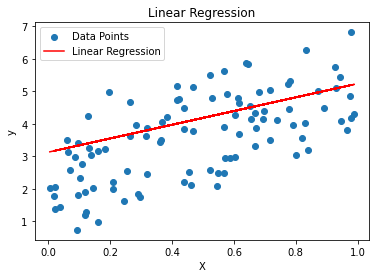

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.randn(100, 1)

# Initialise parameters
eta = np.random.randn(2, 1)
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for iteration in range(num_iterations):
    # Compute predictions
    y_pred = x.dot(eta[1]) + eta[0]
    
    # Compute gradients
    gradients = 2 / len(x) * x.T.dot(y_pred - y)
    
    # Reshape gradients to match theta shape
    gradients = gradients.mean(axis=1, keepdims=True)
    
    # Update parameters
    eta -= learning_rate * gradients
    
    # Compute cost, this is an example of a cost function
    cost = np.mean((y_pred - y) ** 2)
    
    # Print cost every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Cost = {cost}")

# Print final parameters
print("Final parameters:")
print(f"theta_0 = {eta[0][0]}")
print(f"theta_1 = {eta[1][0]}")

# Plot the data points and the linear regression line
plt.scatter(x, y, label='Data Points')
plt.plot(x, x.dot(eta[1]) + eta[0], color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()



<div style="background-color: #FFFACD; padding: 10px;">

# Logistic Regression [^](#index)<a id='LR'></a>


</div>

Logistic Regression (also called Logit Regression) is com‐ monly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

<div style="background-color: #FFFACD; padding: 10px;">

# Cost Function [^](#index)<a id='cost-function'></a>


</div>

One example of computing the cost is given by (based on the previous linear regression model):

$
J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$

Where:
- $J(\theta)$ represents the cost function.
- $m$ is the number of training examples.
- $h_\theta(x^{(i)})$ represents the predicted value for the $i$ th training example, obtained by multiplying the input features ($x^{(i)}$) with the parameters ($\theta$).
- $y^{(i)}$ represents the actual target value for the $i$ th training example.

The aim of linear regression is to find the optimal set of parameters ($c$, $\theta_1$, $\theta_2$, ...) that minimises the cost function. This involves finding the global minimum of the cost function on a multi-dimensional hypersurface in parameter-space- by executing the code and providing sample values for the input features (X), target values (y), and parameters (theta), you can compute the cost using the compute_cost function.


The aim of linear regression in the example above, is to find the optimal set of parameters ($c$, $\theta_1$, $\theta_2$, ...) that minimises the cost function. This involves finding the global minimum of the cost function on a multi-dimensional hypersurface in parameter-space.

In [4]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    y_pred = X.dot(theta)  # Compute predictions
    cost = np.sum((y_pred - y) ** 2) / (2 * m)  # Compute cost
    return cost

# Example usage:
X = np.array([[1, 1], [1, 2], [1, 3]])  # Input features
y = np.array([[1], [2], [3]])  # Target values
theta = np.array([[0], [1]])  # Parameters

cost = compute_cost(X, y, theta)
print(f"Cost: {cost}")

# We provide sample values for the input features (X), target values (y), 
# and parameters (theta). We call the compute_cost function with these values 
# and print the resulting cost.

Cost: 0.0


<div style="background-color: #FFFACD; padding: 10px;">

# Loss Function [^](#index)<a id='loss-function'></a>


</div>

The terms "cost function" and "loss function" in machine learning are often used interchangeably, but they technically do have different meanings, especially when dealing with complex models or problems.

Loss Function: A loss function, or error function, quantifies how well a single sample of data meets the learning task objectives. It measures the discrepancy between the prediction of the machine learning model and the actual output for that sample. For instance, in a regression problem, Mean Squared Error (MSE) could be used as a loss function, where it measures the squared difference between the actual and predicted values for a particular data point.

Cost Function: A cost function is the average of the loss functions for all individual data samples in a dataset. It represents the overall 'cost' of the performance of a machine learning model on the entire training dataset. In other words, the cost function is a type of loss function, but it is computed as the aggregate of losses across the set of examples, such as all training samples.

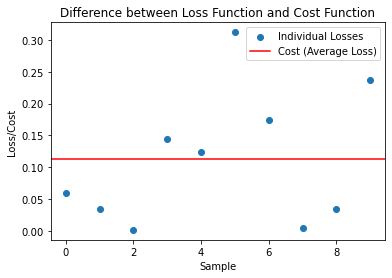

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generating random predictions and actuals
np.random.seed(0)
predictions = np.random.rand(10)
actuals = np.random.rand(10)

# Calculating individual losses (Mean Squared Error for simplicity)
individual_losses = (predictions - actuals) ** 2

# Calculating cost (mean of individual losses)
cost = np.mean(individual_losses)

# Creating a scatter plot for individual losses
plt.scatter(range(len(individual_losses)), individual_losses, label='Individual Losses')

# Creating a horisontal line representing cost
plt.axhline(y=cost, color='r', linestyle='-', label='Cost (Average Loss)')

plt.title('Difference between Loss Function and Cost Function')
plt.xlabel('Sample')
plt.ylabel('Loss/Cost')
plt.legend()

plt.show()


<div style="background-color: #FFFACD; padding: 10px;">

# Least Squares [^](#index)<a id='least-squares'></a>


</div>

The least squares method is a form of mathematical regression analysis that seeks to find the line of best fit for a set of data points. It is often used as a loss function in Machine Learning, particularly for regression problems. The objective is to minimise the sum of the squared differences between the predicted output and the actual output.

Given a set of $n$ points $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, the least squares loss function is defined as:

$$
L = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Here, $y_i$ represents the actual output and $\hat{y}_i$ is the predicted output, defined as $\hat{y}_i = f(x_i)$, where $f$ is our model's function.


For a simple linear regression model defined by $\hat{y} = \theta_0 + \theta_1x$, where $\theta$ represents the parameters $(\theta_0, \theta_1)$, the least squares loss function becomes:
$$
L(\theta) = \sum_{i=1}^{n} (y_i - (\theta_0 + \theta_1x_i))^2
$$

In matrix notation, if we have $m$ examples and $n$ features, and we define $X$ as the $m \times n$ input matrix (with a column of ones for the bias term), $y$ as the $m$-dimensional output vector, and $\theta$ as the parameter vector, the least squares loss function is:

$$
L(\theta) = (X\theta - y)^T(X\theta - y)
$$

The optimal solution for the parameters can be found by setting the gradient of $L$ with respect to $\theta$ to sero, and solving for $\theta$. For linear regression models, this can be done analytically using the normal equation:

$$
\theta = (X^TX)^{-1}X^Ty
$$

However, for more complex models or when $X^TX$ is not invertible, iterative optimisation algorithms such as gradient descent are typically used to minimise the loss function.


<div style="background-color: #FFFACD; padding: 10px;">

# Classification [^](#Index)<a id='classification'></a>


</div>

Classification is a type of supervised learning approach in machine learning where the computer program learns from the input data provided to it and then uses this learning to classify new observations into one of the several classes or categories. 

A classification problem is demonstrated below using Scikit-learn.

An example for classifier is **binary classification**<a id='BC'></a> - a supervised learning algorithm that categorizes new observations into one of two classes.

**Multiclass classification**<a id='MC'></a> is a classification task with more than two classes. Each sample can only be labeled as one class. For example, classification using features extracted from a set of images of fruit, where each image may either be of an orange, an apple, or a pear.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()

# We only take the first two features and two classes (Iris-setosa and others)
X = iris.data[:100, :2]
y = iris.target[:100]

# Standardising the features
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the model
model = LogisticRegression()

# Fit the model with training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the model: {accuracy*100:.2f}%')


Accuracy of the model: 100.00%


<div style="background-color: #FFFACD; padding: 10px;">

## Confusion Matrices <a id='confusionmatrix'></a>[^](#index)

</div>

[Confusion matrix](https://www.sciencedirect.com/topics/engineering/confusion-matrix?__cf_chl_tk=Crxodj7BGB8sRKbgZrrfTXPTqw4nFbMWg4ppME2jIOI-1692801088-0-gaNycGzNC7s) is a very popular measure used while solving classification problems. It can be applied to binary classification as well as for multiclass classification problems. An example of a confusion matrix for binary classification is shown in Table 5.1.

We often adopt the method of confusion matrices when solving classification problems in supervised learning It can be applied to binary classification as well as for multiclass classification problems. An example of a confusion matrix for binary classification is shown in the table below:

|Actual    | Negative | Positive  |
|----------|----------|-----------|
|Negative  |    TN    |    FP     |
|Positive  |    FN    |    TP     |

Confusion matrices represent counts from predicted and actual values. The output “TN” stands for True Negative which shows the number of negative examples classified accurately. Similarly, “TP” stands for True Positive which indicates the number of positive examples classified accurately. The term “FP” shows False Positive value, i.e., the number of actual negative examples classified as positive; and “FN” means a False Negative value which is the number of actual positive examples classified as negative. One of the most commonly used metrics while performing classification is accuracy. 

<div style="background-color: #FFFACD; padding: 10px;">

# Gradient-Based Optimisation (from the Statistics Course)[^](#index)<a id='gradient-based-optimisation'></a>


</div>

In Machine learning, often you will be optimising algorithms to improve the performance of the algorithm. In architechtures such as neural-networks, the weights of the network are *parameters* that can be varied in order to minimise some *loss* function. 

You will see many examples of optimisation and these days there are some extremely sophisticated methods for optimising complicated loss functions, however in this notebook we'll go over the most common starting point for these which is *gradient based optimisation*. 

In statistics, as we've seen in the lectures, the *likelihood* (or negative log-likelihood) function is our loss function and we often need to maximise (minimise) it with respect to one or more of its parameters. 

In general, this means we're looking for the set of parameter values ($\theta$) for which, 

$$
\frac{\partial q}{\partial \theta}= 0
$$

where $q = -\log(L)$

There are two algorithms that use the gradient of the likelihood to find the maximum point that we'll go over in this notebook. 

<div style="background-color: #FFFACD; padding: 10px;">

## Newton Method [^](#index)<a id='newton-method'></a>

</div>

You are probably very familar with the Newton method (from school even?), which relies on the gradient of the function to find roots (or seros) of the function. In our setup, since we are trying to find the seros of the gradient function, we'll also need to know the 2nd derivative. 

This method is very reliable for 1-dimensional problems (one parameter that is being maximised). The way this works is that from some initial starting point $\theta_{0}$, the algorithm proposes the next step as, 

$$
\theta_{1} = \theta_{0} - \frac{q^{\prime}(\theta_{0})}{q^{\prime\prime}(\theta_{0})}
$$

where $q^{\prime} = \frac{dq}{d\theta}$, and $q^{\prime\prime} = \frac{d^{2}q}{d\theta^{2}}$.

The algorithm continues until some tolerance is reached, $\lvert q^{\prime}\rvert < \delta$ where $\delta$ is some small number greater than 0. 

A more visual repersentation is given by the gif below:

![Optimise](explh.gif)

<div style="background-color: #FFFACD; padding: 10px;">

## Gradient Descent [^](#index)<a id='gradient-descent'></a>


</div>

For functions with more than one variable, we  can use a gradient descent algorithm to find minima and maxima. These methods only rely on the first derivative (the gradient) to find the best direction to step in to find the minimum (or maximum). They don't use the second derivative because for a large number of parameters $n$, the number of terms in the second derivative grows as $n^{2}$ so this can get quite costly. 

There are  a number of subtle different algorithms which rely on gradient descent but we'll go over a simple example. The  way this works is as follows. 

First, we initialise the algorithm at some set of values for the parameters $\boldsymbol{\theta}_{init}$. Then we calcualte the gradient of the negative log-likelihood - $\nabla(q)\rvert_{\boldsymbol{\theta}_{init}}$ - at that initial point. The gradient defines a direction in which the negative log-likelihood changes most rapidly - this makes this direction a good direction to search for a smaller value of $q$.

$$
\begin{align}
\nabla(q)\rvert_{\boldsymbol{\theta}_{init}} &=   
        \begin{bmatrix}
           \frac{\partial q}{\partial \theta_{1}} \\
           \frac{\partial q}{\partial \theta_{2}} \\
           \vdots \\
           \frac{\partial q}{\partial \theta_{n}}
        \end{bmatrix}_{\boldsymbol{\theta}=\boldsymbol{\theta}_{init}}
\end{align}   
$$

Since we want to *decrease* $q$, we need to move against this gradient. We step along the negative gradient direction until we find a new minimum - i.e we pick a step size $h$ and keep adding it to the initial point until the value of $q$ stops decreasing, 


$$
\boldsymbol{\theta}_{k} = k\times h - \nabla(q)\rvert_{\boldsymbol{\theta}_{init}} 
$$


![Grad](grad.gif)

<div style="background-color: #FFFACD; padding: 10px;">

# Dimensionality Reduction [^](#index)<a id='dimensionality-reduction'></a>

</div>
Dimension reduction is a fundamental step in many data analysis and machine learning tasks. It involves reducing the number of input variables in a dataset. When dealing with high dimensional data, you might want to reduce the dimensionality to simplify the model, reduce the computation time, or remove multicollinearity.

One common technique for dimension reduction is Principal Component Analysis (`PCA`)<a id='PCA'></a>, `PCA` is a technique used to emphasise variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualise.

### Variants of PCA

You should be aware that there exists variants of PCA that can be useful, although the constaints on course length means we will not cover them here. These include:
* **Kernel PCA** where you use a similar kernel trick as with SVMs to introduce nonlinear features (without really doing so).
* Randomised PCA that generates good approximations to the PC in a semi-random way and is very much faster for large feature sets.

Here's a simple example of how to perform `PCA` using Python's Scikit-learn:


Original number of features: 4
Reduced number of features: 3


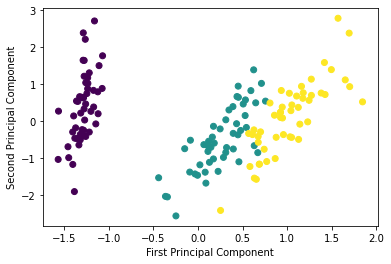

In [7]:
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

# Visualise the data in the two-dimensional space
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In the code above, we first import the necessary libraries and load the iris dataset. We then create a `PCA` object that will retain **99% of the variance** (Remind yourself of why retaining variance is important in performing dimension reduction). We fit and transform the data using this PCA object. Finally, we print the original and reduced number of features and visualise the data in the two-dimensional space.

For more information about `PCA` and other dimension reduction techniques, you can refer to the Scikit-learn documentation: Scikit-learn: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).




<div style="background-color: #FFFACD; padding: 10px;">

## Clustering in Unsupervised Learning [^](#index)<a id='clustering'></a>

</div>
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”. A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters. K-means<a id='K'></a> can take an unlabeled data set and group it into a set number (K) of clusters. 

[More on unsupervised learning](https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a)

<div style="background-color: #FFFACD; padding: 10px;">

# SVD Visualisation [^](#index)<a id='SVD'></a>
</div>

$A = USV^T$ is the original matrix


$U$ is a matrix whose columns are the left singular vectors of $A$.
$S$ (often depicted as $\sum_{}$) is a diagonal matrix containing the singular values of $A$.
$V^T$ is the transpose of a matrix whose columns are the right singular vectors of $A$.

The singular values in $S$ are the square roots of the eigenvalues of the original matrix $A$. The singular vectors are a set of orthogonal vectors in the domain and range of the original matrix $A$.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from scipy.linalg import svd

np.random.seed(0)  # For reproducible results

A = np.random.rand(10, 10)

U, s, Vt = svd(A)


def plot_svd(num_singular_values):
    S = np.zeros((10, 10))
    S[:num_singular_values, :num_singular_values] = np.diag(s[:num_singular_values])
    
    A_approx = U @ S @ Vt  # Compute approximation of A using reduced singular values

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(A, cmap='viridis')
    axs[0].set_title('Original Matrix')

    axs[1].imshow(A_approx, cmap='viridis')
    axs[1].set_title(f'Approximation using {num_singular_values} singular values')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()


interact(plot_svd, num_singular_values=IntSlider(min=1, max=10, step=1, value=5));


interactive(children=(IntSlider(value=5, description='num_singular_values', max=10, min=1), Output()), _dom_cl…

<div style="background-color: #FFFACD; padding: 10px;">

# Support Vector Machine (SVM)[^](#index) <a id='SVM'></a>
    
</div>

SVMs are amongst the most used of all ML techniques. They can classify and regress (although they are more often used in classification in my world). [HOML](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) is really very clear in describing these and I recommend their description.

If your feature space has N dimensions then the SVM draws a $N-1$ dimensional surface between the different things that you are trying to classify. The purpose of this is to create well-defined boundaries between clusters, such that a datapoint with a particular set of characteristics is classified with maximum accuracy. SVMs are particularly useful when you have moderate volumes of data (up to around $10^5$ datapoints).
Support vector machines ([SVMs](https://scikit-learn.org/stable/modules/svm.html)) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

*The SVM notebook outlines SVM's detailed mathematical background.*

<div style="background-color: #FFFACD; padding: 10px;">
    
## Hard and Soft Margin in SVM <a id='Hard'></a><a id='Soft'></a>[^](#index)
</div>

Hard margin SVM does not allow any misclassification to happen.

In case our data is non-separable/ nonlinear then the Hard margin SVM will not return any hyperplane as it will not be able to separate the data. Hence this is where Soft Margin SVM comes to the rescue.

Soft margin SVM allows some misclassification to happen by relaxing the hard constraints of Support Vector Machine.



<div style="background-color: #FFFACD; padding: 10px;">
    
## Nonlinear SVM Classification <a id='nonlinear'></a>[^](#index)

</div>

[Nonlinear SVM](https://www.geeksforgeeks.org/ml-non-linear-svm/) is necessary when the data cannot be effectively separated by a linear decision boundary in the original feature space. Nonlinear SVM addresses this limitation by utilizing kernel functions to map the data into a higher-dimensional space where linear separation becomes possible. The kernel function computes the similarity between data points, allowing SVM to capture complex patterns and nonlinear relationships between features. This enables nonlinear SVM to handle intricate data distributions, such as curved or circular decision boundaries. By leveraging the kernel trick, nonlinear SVM provides a powerful tool for solving classification problems where linear separation is insufficient, extending its applicability to a wide range of real-world scenarios.


<div style="background-color: #FFFACD; padding: 10px;">

# K-Nearest Neighbours (k-NN) [^](#index) <a id='KNN'></a>

</div>

The k-NN algorithm can be used for both classification and regression. It starts with calculating the distance of a new point $x$ to all other points in the data-set. It then finds the $k$ nearest points closest to $x$ and for:

* **classification** we assign the new data point $x$ to the majority class of its $k$-nearest neighbours. For example, if our goal is to classify cats or dogs and the three nearest data-points ($k=3$) to $x$ are classified as cat, cat, dog, then our new point $x$ would be classified as cat. However, if look at the 10 nearest data points ($k=10$) to $x$ and we find now that 4 are cat and 6 are dog, $x$ would be classified as dog.

* **regression** we see labels as continuous variables and assign the label of data point $x$ as the mean of the labels of its k-nearest neighbours.

A commonly used distance is the (classic) Euclidean distance
$$
d(\mathbf{p},\mathbf{q})=\sqrt{\sum_{i=1}^{D}\left(q_{i}-p_{i}\right)^{2}},
$$

where $\mathbf{p}$ and $\mathbf{q}$ are two points in our $D$-dimensional Euclidean space. Other distances can be chosen interchangably, depending on the problem at hand. 

A helpful resource for the different types of distances and situations where they are used can be found [here](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.).

<div style="background-color: #FFFACD; padding: 10px;">

# [Instance-Based Learning](https://vitalflux.com/instance-based-learning-model-based-learning-differences/#:~:text=Instance%2Dbased%20learning%20(also%20known,easy%20to%20implement%20and%20understand.)) [^](#index) <a id='Instance-Based-Learning'></a>

</div>

**Instance-based learning** (also known as memory-based learning or lasy learning) involves memorising training data in order to make predictions about future data points. This approach doesn’t require any prior knowledge or assumptions about the data, which makes it easy to implement and understand. 

In instance-based learning, the system learns the training data by heart. At the time of making prediction, the system uses similarity measure and compare the new cases with the learned data. K-nearest neighbors (KNN) is an algorithm that belongs to the instance-based learning class of algorithms.

![KNN - img from homl](instance-based.jpg)

In addition to providing accurate predictions, one major advantage of using KNN over other forms of supervised learning algorithms is its versatility; KNN can be used with both numeric datasets – such as when predicting house prices – and categorical datasets – such as when predicting whether a website visitor will purchase a product or not.


<div style="background-color: #FFFACD; padding: 10px;">

# [Model-Based Learning](https://vitalflux.com/instance-based-learning-model-based-learning-differences/#:~:text=Instance%2Dbased%20learning%20(also%20known,easy%20to%20implement%20and%20understand.))[^](#index)
<a id='Model-Based-Learning'></a>
</div>

Model-based learning (also known as structure-based or eager learning) takes a different approach by constructing models from the training data that can generalise better than instance-based methods. This involves using algorithms like linear regression, logistic regression, random forest, etc. trees to create an underlying model from which predictions can be made for new data points. The picture below represents how the prediction about the class is decided based on boundary learned from training data rather than comparing with learned data set based on similarity measures.

![model-based - img from homl](model-based.png)

<div style="background-color: #FFFACD; padding: 10px;">

# Decision Tree [^](#index)<a id='DT'></a>
</div>


Decision trees are intuitive and powerful machine learning models used for classification and regression tasks. They make decisions by recursively splitting the data based on the most informative features, creating a tree-like structure. Each internal node represents a feature, and each edge represents a possible outcome. The simplicity and interpretability of decision trees make them valuable for understanding the decision-making process and gaining insights from the data. However, decision trees can be prone to overfitting, where they memorize the training data too well and perform poorly on unseen data. To address this, techniques like pruning and using ensemble methods such as Random Forest or Gradient Boosting can improve their generalization and performance, making them even more robust and reliable models in various real-world applications.

Boosting<a id='BT'></a> means combining a learning algorithm in series to achieve a strong learner from many sequentially connected weak learners. In case of gradient boosted decision trees algorithm, the weak learners are decision trees.

<div style="background-color: #FFFACD; padding: 10px;">
    
# Gradient flow [^](#index)  <a id='gradient-flow'></a>
</div>

**Gradient flow** describes how activation functions propagate the gradients of the loss function (referred to here as gradients) through the network.

Just like in the linear models, we can minimise the loss by moving in the direction of the negative gradient of the loss function. Different to linear models, the relationship between loss function and the weights and bias is often not direct (there may be many NN layers with activation function in between).


<div style="background-color: #FFFACD; padding: 10px;">

# Activation Function [^](#index)
<a id='Activation-Function'></a>
</div>

An activation function is a key component of artificial neural networks(ANN) that introduces non-linearity into the network's computations. It helps determine the output of a neural network node or neuron, based on the weighted sum of its inputs.

The activation function introduces non-linear transformations to the input data, enabling neural networks to learn and model complex patterns and relationships in the data. Without activation functions, neural networks would essentially reduce to linear transformations, limiting their ability to represent and approximate non-linear functions.

<div style="background-color: #FFFACD; padding: 10px;">

## Activation Function Overview [^](#index)
<a id='Activation-Function-Overview'></a>
</div>

### Sigmoid（Logistic)

The sigmoid function has the form: $$f(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{e^x + 1}$$


### Tanh

The $tanh$ function has the form: 
    
$$ f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

### ReLU

ReLU stands for "Rectified Linear Unit", and has the form: 
    
$$ f(x) = \max(0,x) =  \begin{cases}
                                                                                    x, & x > 0 \\
                                                                                    0, & x \leq 0
                                                                                   \end{cases}$$

                                                                     
### Leaky ReLU

The Leaky ReLU function had the form: 

$$ f(x) =  \begin{cases}
  x, & x > 0 \\
  ax, & x \leq 0
 \end{cases}, \textrm{ } (a<1).$$
 
 
### ELU

ELU stands for "Exponential Linear Unit". Notice that when $\alpha=0$, it reduces to the ReLU function. ELU has the form:
    
$$ f(x) = \begin{cases}
  x, & x > 0 \\
  \alpha(e^x-1), & x \leq 0
 \end{cases}$$
 
 
### Swish

The Swish function is the sigmoid function multipied by $x$. It has the form:
$$f(x) = \frac{x}{1+e^{-x}}$$

**Sigmoid**: This function is used to introduce non-linearity into the network. However, it suffers from the problem of gradient diffusion, which can slow down the learning process.

**Tanh**: This function is an updated version of the sigmoid function, with a higher convergence rate. However, it also suffers from the problem of gradient diffusion.

**ReLU (Rectified Linear Unit)**: This function is a piecewise function that forces the output to be zero if the input value is less than or equal to zero. Otherwise, it makes the output value equal to the input value. This function provides a much faster computing rate and doesn't suffer from the gradient diffusion problem. However, it can lead to neuronal necrosis when a neuron with a large gradient passes through the ReLU function, which can affect the final recognition result.

**Leaky ReLU**: This function is a variant of ReLU that allows small negative values when the input is less than zero. This reduces the problem of neuronal death (dying ReLU problem) but has more computation than the ReLU function.

**ELU (Exponential Linear Unit)**: This function is another variant of ReLU that also allows small negative values when the input is less than zero, reducing the problem of neuronal death. The paper does not provide specific details about the pros and cons of ELU.

**Swish**: The paper does not provide specific details about the Swish function.

<!-- [Sharma, O., "A New Activation Function for Deep Neural Network," 2019 International Conference on Machine Learning, Big Data, Cloud and Parallel Computing (COMITCon), Faridabad, India, 2019, pp. 84-86, doi: 10.1109/COMITCon.2019.8862253] -->

<div style="background-color: #FFFACD; padding: 10px;">

# Neural Network [^](#index) <a id='Neural-Network'></a>

</div>

A neural network is a type of machine learning model that is inspired by the human brain. It consists of interconnected layers of nodes, or "neurons," which process information using dynamic state responses to external inputs.

Neural networks are a subset of machine learning and are at the heart of deep learning algorithms. They are known for their ability to detect and use patterns in data to learn and improve their performance over time, making them highly effective for complex tasks such as image and speech recognition, natural language processing, and more. (Further explained [here](http://neuralnetworksanddeeplearning.com/chap1.html))



<div style="background-color: #FFFACD; padding: 10px;">

# Layers [^](#index) <a id='Layers'></a>

    
</div>

Visual Display of the NN Laysers
![NN.png](NN.png)

Here's a basic overview of how a neural network works:

**Input Layer**: This is where the network receives data for processing. Each node in this layer represents a single feature or attribute of the data.

**Hidden Layers**: These are layers of nodes between the input and output layers. Each node in these layers performs calculations and transformations on the data received from the previous layer. The number of hidden layers and nodes in each layer can vary, and this is what makes the network "deep" in deep learning.

**Output Layer**: This is where the final output is produced. The output can be a single node for binary classification problems, or multiple nodes for multi-class classification or regression problems.

**Weights and Biases**: These are parameters within the network that are adjusted during the learning process. They determine the strength of the influence of one node on another.

**Activation Function**: This is a function that is applied at each node. It determines whether and to what extent the information that node has received should be passed on to the next layer.

**Backpropagation and Gradient Descent**: These are the processes by which the network learns. In backpropagation, the network calculates the error of its output in comparison to the expected output. It then uses gradient descent to adjust the weights and biases to minimise this error.

Training, Validation, and Testing: These are stages in the model development process. In the training stage, the model learns from a dataset by adjusting its weights and biases. In the validation stage, the model's performance is evaluated and its hyperparameters are tuned. In the testing stage, the model's final performance is evaluated on a separate dataset.

<div style="background-color: #FFFACD; padding: 10px;">

## Forward Propagation & Backward Propagation [^](#index)
<a id='FBP'></a>
</div>

**Forward Propagation:**
Where input data is fed through a network, in a forward direction, to generate an output. The data is accepted by hidden layers and processed, as per the activation
function, and moves to the successive layer. The forward flow of data is designed to avoid data moving in a circular motion, which does not generate an output. In the layers, the neural network makes a prediction (forward pass) using the current weights and biases. This prediction is compared with the actual output, and the difference is calculated as an error using a loss function.

**Backward Propagation:**
Backpropagation, short for "backward propagation of errors," is a method used in artificial neural networks to calculate the gradient that is needed in the calculation of the weights to be used in the network. It is commonly used during the training process to optimise the weights of the neurons and minimise the error of the network's output compared to the expected output Backpropagation works by calculating the gradient of the loss function with respect to each weight in the network through the chain rule of calculus, which allows us to break down complex expressions into simpler ones. 


<div style="background-color: #FFFACD; padding: 10px;">

## Weight [^](#index)
<a id='Weight'></a>
</div>

Neural nets are used in machine learning to analyse training examples and learn to perform tasks. They consist of interconnected processing nodes organised into layers. Each node assigns weights to its incoming connections, multiplies the data by the weights, and sums the products. If the sum exceeds a threshold, the node sends the output to the next layer. During training, the weights and thresholds are adjusted until consistent outputs are obtained for data with the same labels.

<div style="background-color: #FFFACD; padding: 10px;">

## Artificial Neural Networks (NN) [^](#index)
<a id='ANN'></a>
</div>

A Neural Network (NN) is a computational model inspired by the structure and functioning of the human brain. It is a type of artificial intelligence algorithm used for various machine learning tasks, including classification, regression, pattern recognition, and decision making.

The basic building block of a neural network is a neuron, also called a node or unit. Neurons are organized into layers: an input layer, one or more hidden layers, and an output layer. Each neuron in a layer is connected to every neuron in the subsequent layer, forming a network of interconnected nodes.



<div style="background-color: #FFFACD; padding: 10px;">

## Convolutional Neural Networks (CNN) [^](#index)
<a id='CNN'></a>
</div>

A convolutional neural network can have tens or hundreds of layers that each learn to detect different features of an image. Filters are applied to each training image at different resolutions, and the output of each convolved image is used as the input to the next layer. The filters can start as very simple features, such as brightness and edges, and increase in complexity to features that uniquely define the object.


More information on CNN can be found in the Week 10 CNN course, or for more information press [here](https://www.mathworks.com/discovery/convolutional-neural-network-matlab.html#:~:text=A%20convolutional%20neural%20network%20(CNN,%2Dseries%2C%20and%20signal%20data.).


<div style="background-color: #FFFACD; padding: 10px;">

## Graph Neural Networks (GNN)* [^](#index)
<a id='GNN'></a>
</div>

Graph Neural Network (GNN) is a type of artificial neural network designed to process and analyse data represented as graphs. Graphs consist of nodes (also known as vertices) and edges (also known as connections) that link the nodes together. GNNs are particularly useful for tasks that involve structured data with complex relationships, such as social networks, recommendation systems, molecular chemistry, and knowledge graphs.

Unlike traditional neural networks that operate on fixed-size vectors or sequences, GNNs can handle variable-sized data due to the flexible nature of graphs. They leverage message passing algorithms to propagate information across the graph, allowing each node to learn from its neighbors' features and aggregate relevant information in a localized manner.

<div style="background-color: #FFFACD; padding: 10px;">

## Recurrent Neural Networks (RNN)* [^](#index)
<a id='RNN'></a>
</div>

Recurrent Neural Network (RNN) is a type of artificial neural network designed to handle sequential data by maintaining internal states and processing information in a temporal sequence. Unlike traditional feedforward neural networks that process fixed-size inputs, RNNs have loops that allow information to persist over time, making them well-suited for tasks involving time series data, natural language processing, speech recognition, and more.

The key feature of an RNN is its ability to capture dependencies and patterns in sequential data by using the same set of weights across all time steps. This characteristic enables RNNs to model context and temporal dynamics, making them particularly useful for tasks where the order of data elements matters.